<a href="https://colab.research.google.com/github/Arina1004/data_mining/blob/master/visualization_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker  
%matplotlib inline

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Выбранные данные (houses_to_rent_v2.csv) отражают стоимость аренды домов в Бразилии.   Этот набор данных содержит 10692 дома для аренды с 13 различными характеристиками. 
 city - город, в котором находится недвижимость;
 area - площадь; rooms - количество комнат;  bathroom - количество ванных комнат;
 parking spaces - количество мест для парковки; floor - количество этажей; animal - разрешены ли животные; furniture - наличие мебели; hoa - стоимость налога домовладельцев; rent amount - стоимость арендной платы; property tax - стоимость имущественного налога; Fire Insurance - стоимость страховка от пожара; total - конечная стоимость аренды жилья
 

In [49]:
data = pd.read_csv('/content/drive/My Drive/houses_to_rent_v2.csv', index_col =False)
data.head()

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


Стоимость аренды дома относительно количества комнат

Text(0.5, 1.0, 'Price by city')

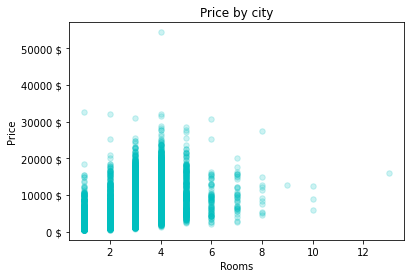

In [50]:
new_data=data[data.total < 60000]
city_data = new_data.rooms.values
total_data = new_data.total.values
plt.scatter(city_data, total_data, alpha=0.2, c='c', s=30)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d $'))
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.title('Price by city')

Можно отметить, что больше всего домов площадью менее 250. С увелечением площади растет и цена. 

Text(0.5, 1.0, 'Price by area')

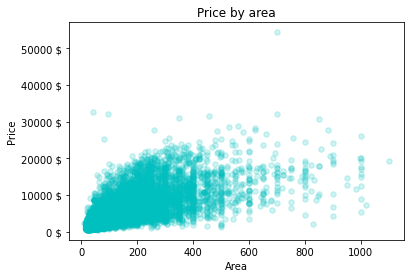

In [51]:
new_data=data[(data.area < 1250) & (data.total < 60000)]
city_data = new_data.area.values
total_data = new_data.total.values
plt.scatter(city_data, total_data, alpha=0.2, c='c', s=30)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d $'))
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price by area')

Больше всего домов сдается в Sao Paulo.

Text(0.5, 1.0, 'Count house in diffetent city')

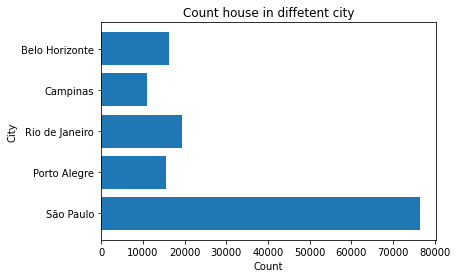

In [34]:
city_data_count = []
city_data = pd.unique(data.city)
for city in city_data:
    city_data_count.append(data[data.city == city].size)
plt.barh(city_data, city_data_count)
plt.xlabel('Count')
plt.ylabel('City')
plt.title('Count house in diffetent city')

Средняя цена за дом с одной комнатой площадью больше 50 и меньше 100 по городам. 

city
Belo Horizonte    2326.000000
Campinas          2010.400000
Porto Alegre      2031.184615
Rio de Janeiro    3087.202532
São Paulo         4348.251852
Name: total, dtype: float64

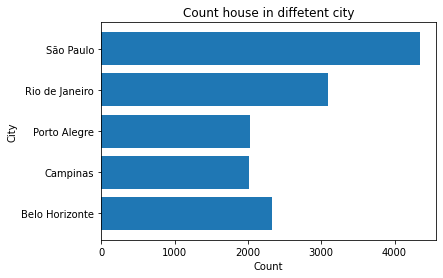

In [35]:

new_data=data[(data.rooms ==1) & (data.area > 50) & (data.area < 100)]
total_by_city= new_data.groupby('city')['total'].mean()
plt.barh(total_by_city.keys(), total_by_city)
plt.xlabel('Count')
plt.ylabel('City')
plt.title('Count house in diffetent city')
total_by_city

Стоимость в São Paulo на 27% ниже, если арендовать дом площадью больше 50 и меньше 100 с двумя комнатами, нежели одной.

city
Belo Horizonte    1989.472637
Campinas          1929.046243
Porto Alegre      2075.681250
Rio de Janeiro    3391.065693
São Paulo         3403.496774
Name: total, dtype: float64

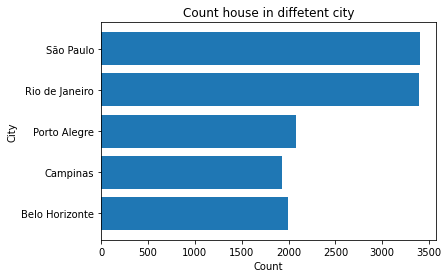

In [36]:
new_data=data[(data.rooms ==2) & (data.area > 50) & (data.area < 100)]
total_by_city= new_data.groupby('city')['total'].mean()
plt.barh(total_by_city.keys(), total_by_city)
plt.xlabel('Count')
plt.ylabel('City')
plt.title('Count house in diffetent city')
total_by_city

 График имущественого налога относительно площади

Text(0, 0.5, 'Property tax')

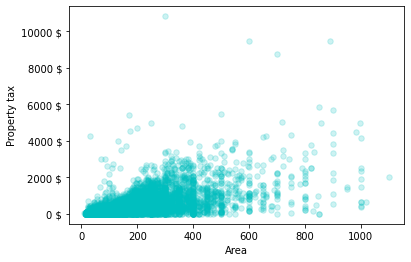

In [37]:
new_data=data[(data.area < 1250) & (data.total < 25000)]
city_data = new_data.area.values
total_data = new_data.property_tax.values
plt.scatter(city_data, total_data, alpha=0.2, c='c', s=30)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d $'))
plt.xlabel('Area')
plt.ylabel('Property tax')

 График налога домовладельцев относительно площади

Text(0, 0.5, 'Property tax')

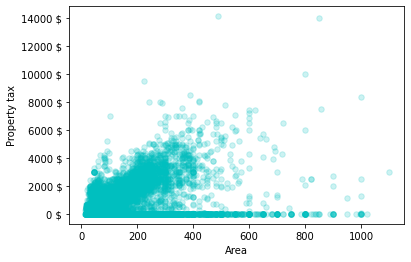

In [63]:
new_data=data[(data.area < 1250) & (data.total < 25000)]
city_data = new_data.area.values
data = new_data.hoa.values
plt.scatter(city_data, data, alpha=0.2, c='c', s=30)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d $'))
plt.xlabel('Area')
plt.ylabel('Property tax')

ОБРАБОТКА ПРОПУСКОВ

Избавимся от объектов, на которых значение хотя бы одного из признаков пропущено.

In [84]:
data.dropna(subset=['area','property_tax'], axis=0, how='any', thresh=None, inplace=True)

Line Regression 

Линейная регрессия некоторой зависимой переменной y на набор независимых переменных  x = (x₁, …, xᵣ), где r – это число предсказателей, предполагает, что линейное отношение между y и x: y = 𝛽₀ + 𝛽₁x₁ + ⋯ + 𝛽ᵣxᵣ + 𝜀. Это уравнение регрессии. 𝛽₀, 𝛽₁, …, 𝛽ᵣ – коэффициенты регрессии, и 𝜀 – случайная ошибка.

Линейная регрессия вычисляет оценочные функции коэффициентов регрессии или просто прогнозируемые весы измерения, обозначаемые как b₀, b₁, …, bᵣ. Они определяют оценочную функцию регрессии f(x) = b₀ + b₁x₁ + ⋯ + bᵣxᵣ. Эта функция захватывает зависимости между входами и выходом достаточно хорошо.

Для каждого результата наблюдения i = 1, …, n, оценочный или предсказанный ответ f(xᵢ) должен быть как можно ближе к соответствующему фактическому ответу yᵢ. Разницы yᵢ − f(xᵢ) для всех результатов наблюдений называются остатками. Регрессия определяет лучшие прогнозируемые весы измерения, которые соответствуют наименьшим остаткам.

Для получения лучших весов, вам нужно минимизировать сумму остаточных квадратов (SSR) для всех результатов наблюдений: SSR = Σᵢ(yᵢ − f(xᵢ))². Этот подход называется методом наименьших квадратов.

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNetCV
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
data = pd.read_csv('/content/drive/My Drive/houses_to_rent_v2.csv', index_col =False)
data.head()

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


R2 = r2_score(y_true, y_pred)
Коэффициент детерминации показывает, какую долю дисперсии (разнообразия ответов) во всем целевом векторе модель смогла объяснить насколько модель соответствует данным.
0≤𝑅2≤1,

𝑅=1–идеальная модель(функциональная зависимость между переменными);

𝑅=0–оптимальная «константная» модель (возвращает всегда среднее значение ответов y для объектов обучающей выборки);

𝑅<0–такие модели не стоит рассматривать.
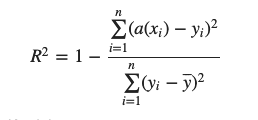



mean_squared_error - среднеквадратичная ошибка (MSE). Чтобы рассчитать MSE, надо взять разницу между предсказаниями модели и основополагающей правдой, возвести ее в квадрат и усреднить ее по всему набору данных.

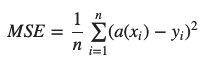

**Преимущество**: MSE отлично подходит для гарантии того, что  обученная модель не имеет прогнозируемых выбросов с огромными ошибками, поскольку MSE придает большее значение этим ошибкам из-за квадратной части функции.

**Недостаток:**Если модель делает одно очень плохое предсказание, то квадратичная часть функции увеличивает ошибку.

Средняя абсолютная ошибка (MAE) лишь немного отличается по определению от MSE. Чтобы рассчитать MAE, вы берете разницу между предсказаниями вашей модели и основополагающей правдой, применяете абсолютное значение к этой разнице и затем усредняете его по всему набору данных.

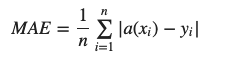

**Преимущество**: Прелесть MAE заключается в том, что его преимущество напрямую покрывает недостаток MSE. Поскольку мы берем абсолютное значение, все ошибки будут взвешены в одной линейной шкале. Таким образом, в отличие от MSE, мы не будем придавать слишком большой вес нашим выбросам, а наша функция потерь обеспечивает общую и даже меру того, насколько хорошо работает наша модель.

**Недостаток**: Если мы действительно заботимся о прогнозируемых отклонениях нашей модели, то MAE не будет столь же эффективным. Большие ошибки, возникающие из-за выбросов, в конечном итоге взвешиваются точно так же, как и более низкие ошибки. Это может привести к тому, что наша модель в большинстве случаев будет отличной, но время от времени делает несколько очень плохих прогнозов.


LinearRegression
model_coef:  [2.74836194]
model_intercept:  -60.541256165890616
r2_score:  0.41086170782391485
mse:  179835.12116586068
rmse:  424.06971262501247
----------------------------------------------------
ElasticNet
model_coef:  [2.73808832]
model_intercept:  -59.10301881964301
r2_score:  0.41085596672823466
mse:  179836.87364172415
rmse:  424.071778879147


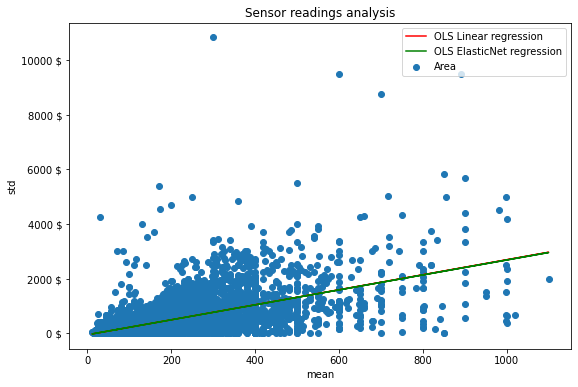

In [86]:
new_data=data[(data.area < 1250) & (data.total < 25000)]
x = new_data.area.values
y = new_data.property_tax.values
# Делаем модель линейной регрессии
model = LinearRegression()
# ... и обучаем её 
model.fit(x.reshape(-1, 1), y)

# просмотр параметров модел
print('LinearRegression')
print('model_coef: ', model.coef_)
print('model_intercept: ', model.intercept_)

# Нарисуем график с обучающими данными и моделью
demo_x = x
demo_y = model.predict(demo_x.reshape(-1, 1))

plt.figure(figsize = (9, 6))
plt.scatter(x, y, label = 'Area')
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d $'))
plt.plot(demo_x, demo_y, color = 'r', label = 'OLS Linear regression')
plt.xlabel('mean')
plt.ylabel('std')
plt.title('Sensor readings analysis')
# plt.legend()


print('r2_score: ',r2_score(y, demo_y))
print('mse: ', mean_squared_error(y, demo_y))
print('mae: ', mean_absolute_error(y, demo_y)

print('----------------------------------------------------')
# Elastic Net Regression
model = ElasticNet(alpha=91.265996, l1_ratio=0.500000)
# ... и обучаем её 
model.fit(x.reshape(-1, 1), y)

# просмотр параметров модели
print('ElasticNet')
print('model_coef: ', model.coef_)
print('model_intercept: ', model.intercept_)

# Нарисуем график с обучающими данными и моделью
demo_x = x
demo_y = model.predict(demo_x.reshape(-1, 1))

plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d $'))
plt.plot(demo_x, demo_y, color = 'g', label = 'OLS ElasticNet regression')
plt.legend()


print('r2_score: ',r2_score(y, demo_y))
print('mse: ', mean_squared_error(y, demo_y))
print('rmse: ', np.sqrt(mean_squared_error(y, demo_y)))

Визуально видно, что данные регресии подходят, для того чтобы убедиться в этом посторим гистограмму и оценим ее 'нормальность'. Так же линейная регрессия и ElasticNet совпали (ElasticNet модификации обычной линейной регрессии), это означает, что ее дополнительные штрафы не дали преимущества 

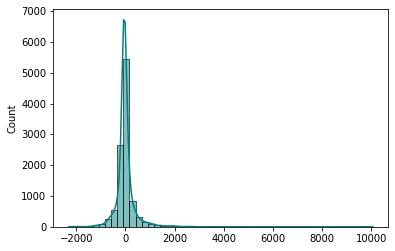

In [82]:
errors = y - demo_y
sns.histplot(errors, color="teal", kde=True, bins=50)

Elastic Net Regression

Эластичная сеть — это гибрид методов регрессии лассо и гребневой регрессии. Она использует как L1, так и L2 регуляризации, учитывая эффективность обоих методов.
min || Xw — y ||² + z_1|| w || + z_2|| w ||²
Практическим преимуществом использования регрессии лассо и гребневой регрессии является то, что это позволяет эластичной сети наследовать некоторую стабильность гребневой регрессии при вращении.

<AxesSubplot:ylabel='Count'>

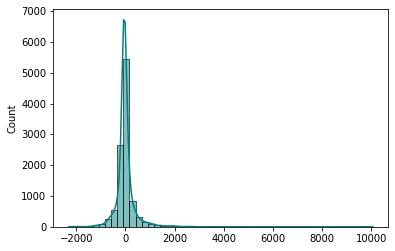

In [ ]:
errors = y - demo_y
sns.histplot(errors, color="teal", kde=True, bins=50)

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
ratios = np.arange(0, 1, 0.01)
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 100.0]
model = ElasticNetCV(cv=cv, n_jobs=-1)
# fit model
model.fit(x.reshape(-1, 1), y)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)
print('l1_ratio_: %f' % model.l1_ratio_)

alpha: 91.265996
l1_ratio_: 0.500000


Попробуем обучить наши выборки. Используем отложенную выборку. Отложенная выборка – часть данных из выборки не участвуют в обучении, а позже на них проверяют обученный алгоритм. Преимущество отложенной выборки – обучать алгоритм нужно 1 раз.Но результат сильно зависит от того, как было произведено разбиение. Однако если не правильно разбить выборку, то результат будет некорректным. Алгоритм может обучиться на данных одного типа, а примениться к другим.

R2:  0.43265464008235865
R2:  0.4325699151742779


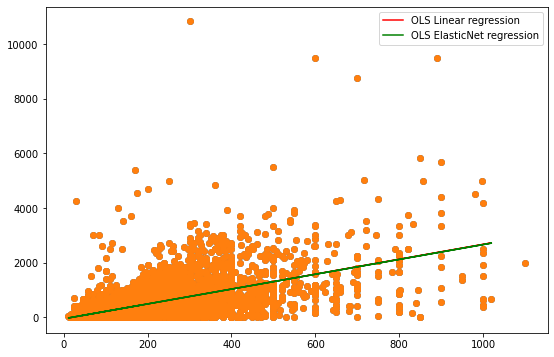

In [315]:
new_data=data[(data.area < 1250) & (data.total < 25000)]
x = new_data.area.values
y = new_data.property_tax.values

x_train, x_test, y_train, y_test = train_test_split(x.reshape(-1, 1), y, test_size = 0.33, random_state = 56)


model = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
y_pred = model.predict(x_test)

plt.figure(figsize = (9, 6))
plt.scatter(x, y)
plt.plot(x_test, y_pred, color = 'r', label = 'OLS Linear regression')
plt.legend()

print('R2: ', r2_score(y_test, y_pred))

model = ElasticNet(alpha=91.265996, l1_ratio=0.500000).fit(x_train.reshape(-1, 1), y_train)
y_pred = model.predict(x_test)

plt.scatter(x, y)
plt.plot(x_test, y_pred, color = 'g', label = 'OLS ElasticNet regression')
plt.legend()

print('R2: ', r2_score(y_test, y_pred))

In [ ]:
Обучение дало незначительно преимущество нашим регрессиям

In [232]:
data = pd.read_csv('/content/drive/My Drive/houses_to_rent_v2.csv', index_col =False)
data.dropna(subset=['area','property_tax'], axis=0, how='any', thresh=None, inplace=True)
new_data = data[(data.area < 1250) & (data.total < 25000)]

Приведем наши данные к нормальному распределению. Так как некоторые методы для анализа данных предпологают работу с данными близкими к нормальному распределению. То есть из каждой точки надо вычесть среднее и поделить на дисперсию.

In [212]:
from sklearn.preprocessing import StandardScaler

# df_scaled = pd.DataFrame(StandardScaler().fit_transform(new_data),columns = new_data.columns)


# **Поиск Аномалий**
**Z-Score**

Суть метода заключаеться в том, чтобы убрать точки выходящие за 2,5 стандартных отклонения. Если распределение данных приблизительно нормальное, то около 99% значений данных находятся в пределах 2,5 стандартного отклонения от среднего. Поэтому, если у вас есть какая-либо точка данных, которая более чем в 2.5 раза превышает стандартное отклонение, то эти точки, скорее всего, будут аномальными.

In [268]:

def remove_anomalies(data,values):
    anomalies = []
    data_std = np.std(values)
    data_mean = np.mean(values)
    anomaly_cut_off = data_std * 2.5
    
    lower_limit  = data_mean - anomaly_cut_off 
    upper_limit = data_mean + anomaly_cut_off

    new_data = data[(data.area < upper_limit) & (data.area > lower_limit)]
    print(len(values)-len(new_data))
    return new_data

In [270]:
area = new_data.area.values
property_tax = new_data.property_tax.values
cleaned_data = remove_anomalies(new_data, area)
cleaned_area = cleaned_data.area.values
cleaned_property_tax = cleaned_data.property_tax.values

316


Мы нашли 316 анамольний точек, которые выходят за 2,5𝜎, теперь посмотрим даст ли это улучшение регресиям.

R2:  0.3856192206026874
R2:  0.3856281017020998


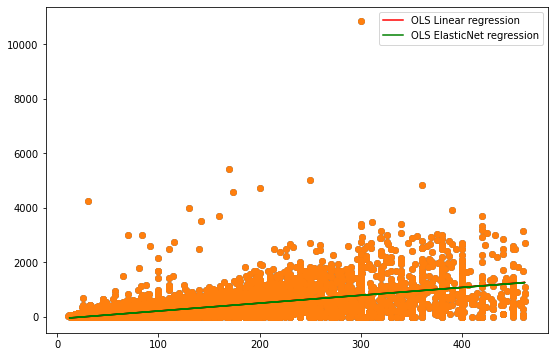

In [317]:
x = cleaned_area
y = cleaned_property_tax

x_train, x_test, y_train, y_test = train_test_split(x.reshape(-1, 1), y, test_size = 0.33, random_state = 56)


model = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
y_pred = model.predict(x_test)

plt.figure(figsize = (9, 6))
plt.scatter(x, y)
plt.plot(x_test, y_pred, color = 'r', label = 'OLS Linear regression')
plt.legend()

print('R2: ', r2_score(y_test, y_pred))

model = ElasticNet(alpha=91.265996, l1_ratio=0.500000).fit(x_train.reshape(-1, 1), y_train)
y_pred = model.predict(x_test)

plt.scatter(x, y)
plt.plot(x_test, y_pred, color = 'g', label = 'OLS ElasticNet regression')
plt.legend()

print('R2: ', r2_score(y_test, y_pred))

После чистки от аномальных значений регресии стали вести себя хуже. Попробуем разобраться почему так стало. Обратим внимание на начальные огранечения для данных:  new_data = data[(data.area < 1250) & (data.total < 25000)]
Данное огранечение по сути уже убрало аномальные значения, получается вторая чистка данных становиться излишней. Построим наши регресси на исходных данных и сравним с данными после чистки аномалий Z-Score.

R2:  0.02688736508266021
R2:  0.026865778485508973


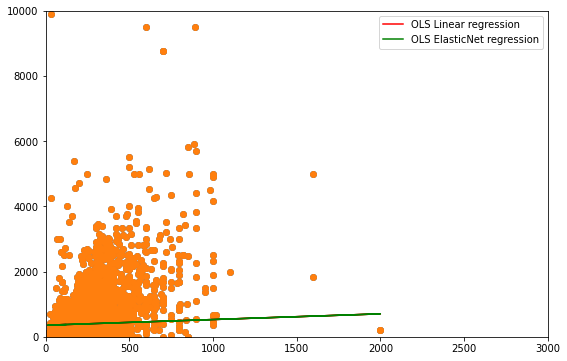

In [319]:
x = data.area.values
y = data.property_tax.values

x_train, x_test, y_train, y_test = train_test_split(x.reshape(-1, 1), y, test_size = 0.33, random_state = 56)


model = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
y_pred = model.predict(x_test)

plt.figure(figsize = (9, 6))
plt.scatter(x, y)
plt.plot(x_test, y_pred, color = 'r', label = 'OLS Linear regression')
plt.legend()

print('R2: ', r2_score(y_test, y_pred))

model = ElasticNet(alpha=91.265996, l1_ratio=0.500000).fit(x_train.reshape(-1, 1), y_train)
y_pred = model.predict(x_test)

plt.scatter(x, y)
plt.xlim(0, 3000)
plt.ylim(0, 10000)
plt.plot(x_test, y_pred, color = 'g', label = 'OLS ElasticNet regression')
plt.legend()

print('R2: ', r2_score(y_test, y_pred))

Теперь можно увидеть, что чистка данных дает результат.

# **Регрессия Хьюбера**


 Регрессия Хьюбера меньше подвержена влиянию аномалий, поскольку модель использует для них линейные потери. По мере увеличения параметра эпсилон для регресии Хьюбера решающая функция приближается к функции гребня.

In [283]:
from sklearn.linear_model import HuberRegressor

Liner R2:  0.02688736508266021
ElasticNet R2:  0.026865778485508973
Huber R2:  0.19612177811816778


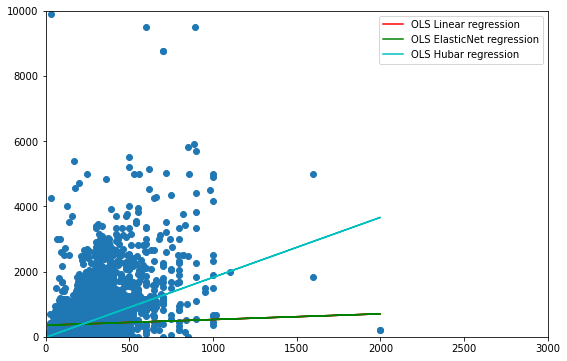

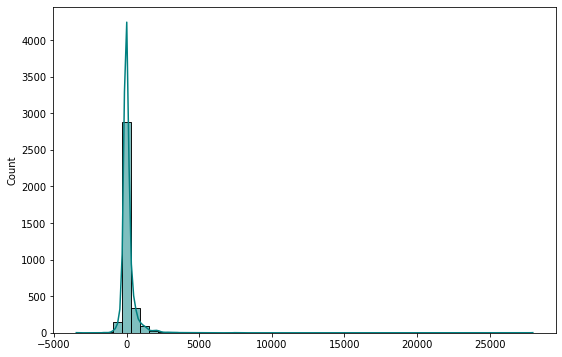

In [320]:
x = data.area.values
y = data.property_tax.values

x_train, x_test, y_train, y_test = train_test_split(x.reshape(-1, 1), y, test_size = 0.33, random_state = 56)


model = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
y_pred = model.predict(x_test)

plt.figure(figsize = (9, 6))
plt.scatter(x, y)
plt.plot(x_test, y_pred, color = 'r', label = 'OLS Linear regression')
plt.legend()

print('Liner R2: ', r2_score(y_test, y_pred))

model = ElasticNet(alpha=91.265996, l1_ratio=0.500000).fit(x_train.reshape(-1, 1), y_train)
y_pred = model.predict(x_test)

plt.xlim(0, 3000)
plt.ylim(0, 10000)
plt.plot(x_test, y_pred, color = 'g', label = 'OLS ElasticNet regression')
plt.legend()

print('ElasticNet R2: ', r2_score(y_test, y_pred))


model = HuberRegressor( alpha=1.0).fit(x_train.reshape(-1, 1), y_train)
y_pred = model.predict(x_test)

plt.plot(x_test, y_pred, color = 'c', label = 'OLS Hubar regression')
plt.legend()

print('Huber R2: ', r2_score(y_test, y_pred))

plt.figure(figsize = (9, 6))
errors = y_test - y_pred
sns.histplot(errors, color="teal", kde=True, bins=50)

Регрессия Хьюбера превосходит предыдущие регресии как раз из-за того что она менее подвержена влиянию аномалий. Построим эту регрессию на данных без аномалий.

Liner R2:  0.3856192206026874
ElasticNet R2:  0.3856281017020998
Huber R2:  0.3499024995857256


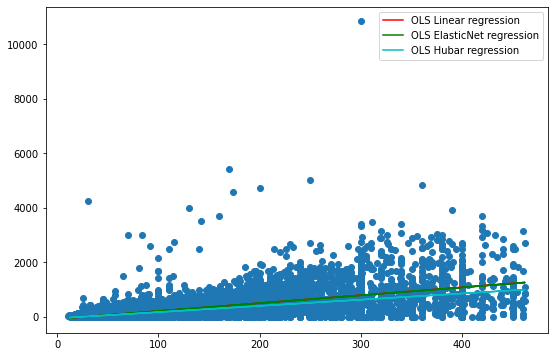

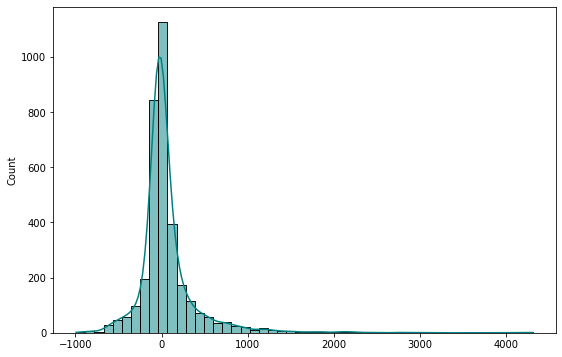

In [324]:
x = cleaned_area
y = cleaned_property_tax

x_train, x_test, y_train, y_test = train_test_split(x.reshape(-1, 1), y, test_size = 0.33, random_state = 56)


model = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
y_pred = model.predict(x_test)

plt.figure(figsize = (9, 6))
plt.scatter(x, y)
plt.plot(x_test, y_pred, color = 'r', label = 'OLS Linear regression')
plt.legend()

print('Liner R2: ', r2_score(y_test, y_pred))

model = ElasticNet(alpha=91.265996, l1_ratio=0.500000).fit(x_train.reshape(-1, 1), y_train)
y_pred = model.predict(x_test)

plt.plot(x_test, y_pred, color = 'g', label = 'OLS ElasticNet regression')
plt.legend()

print('ElasticNet R2: ', r2_score(y_test, y_pred))


model = HuberRegressor( alpha=1.0).fit(x_train.reshape(-1, 1), y_train)
y_pred = model.predict(x_test)

plt.plot(x_test, y_pred, color = 'c', label = 'OLS Hubar regression')
plt.legend()

print('Huber R2: ', r2_score(y_test, y_pred))

plt.figure(figsize = (9, 6))
errors = y_test - y_pred
sns.histplot(errors, color="teal", kde=True, bins=50)

На данных без аномалий ситуация изменилась. Здесь уже не работает ее переимущество.

# **Регрессия Лассо**
В регрессии лассо, добавляеться условие смещения в функцию оптимизации для того, чтобы уменьшить коллинеарность и, следовательно, дисперсию модели. Но вместо квадратичного смещения, используется смещение абсолютного значения:

min || Xw — y ||² + z|| w ||

Регрессия выполняет как выбор переменных, так и регуляризацию, чтобы повысить точность прогнозирования и интерпретируемость результирующей статистической модели.

In [301]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

Liner R2:  0.02688736508266021
ElasticNet R2:  0.026865778485508973
Huber R2:  0.19612177811816778
Lasso R2:  0.026887324801638468


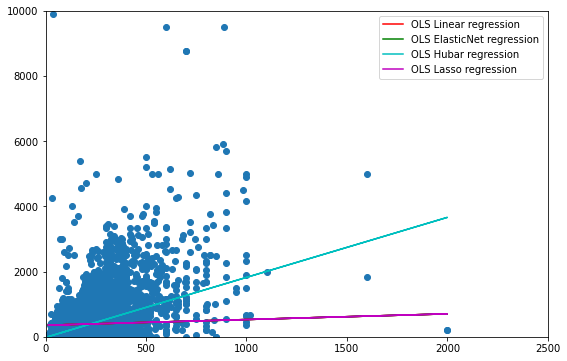

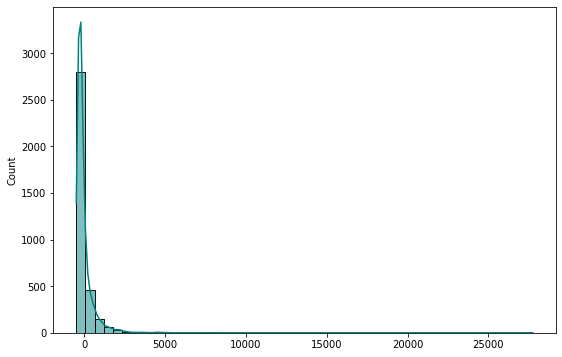

In [333]:
x = data.area.values
y = data.property_tax.values

x_train, x_test, y_train, y_test = train_test_split(x.reshape(-1, 1), y, test_size = 0.33, random_state = 56)


model = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
y_pred = model.predict(x_test)

plt.figure(figsize = (9, 6))
plt.scatter(x, y)
plt.plot(x_test, y_pred, color = 'r', label = 'OLS Linear regression')
plt.legend()

print('Liner R2: ', r2_score(y_test, y_pred))

model = ElasticNet(alpha=91.265996, l1_ratio=0.500000).fit(x_train.reshape(-1, 1), y_train)
y_pred = model.predict(x_test)

plt.xlim(0, 2500)
plt.ylim(0, 10000)
plt.plot(x_test, y_pred, color = 'g', label = 'OLS ElasticNet regression')
plt.legend()

print('ElasticNet R2: ', r2_score(y_test, y_pred))


model = HuberRegressor(alpha=1.0).fit(x_train.reshape(-1, 1), y_train)
y_pred = model.predict(x_test)

plt.plot(x_test, y_pred, color = 'c', label = 'OLS Hubar regression')
plt.legend()

print('Huber R2: ', r2_score(y_test, y_pred))

model = Lasso(alpha=0.1, max_iter = 10000, tol = 0.01).fit(x_train.reshape(-1, 1), y_train) 

y_pred = model.predict(x_test)

plt.plot(x_test, y_pred, color = 'm', label = 'OLS Lasso regression')
plt.legend()

print('Lasso R2: ', r2_score(y_test, y_pred))

plt.figure(figsize = (9, 6))
errors = y_test - y_pred
sns.histplot(errors, color="teal", kde=True, bins=50)

По гистограмме видно, что данные у нас ненормализованые, поэтому данная регрессия плохо подходит. Попробуем на данных без аномалий.

Liner R2:  0.3856192206026874
ElasticNet R2:  0.3856281017020998
Huber R2:  0.3499024995857256
Lasso R2:  0.3856192348856955


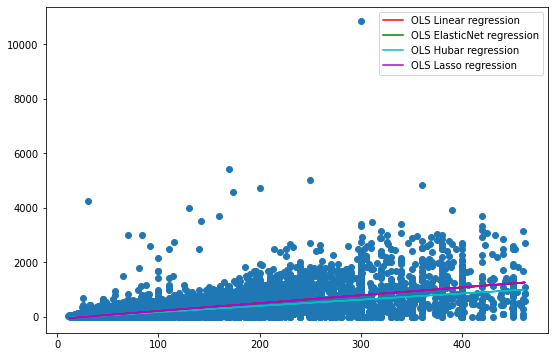

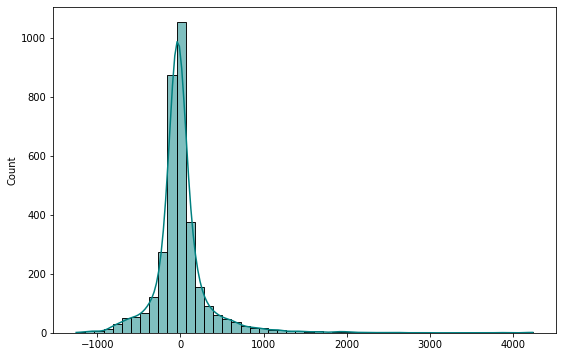

In [327]:
x = cleaned_area
y = cleaned_property_tax

x_train, x_test, y_train, y_test = train_test_split(x.reshape(-1, 1), y, test_size = 0.33, random_state = 56)


model = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
y_pred = model.predict(x_test)

plt.figure(figsize = (9, 6))
plt.scatter(x, y)
plt.plot(x_test, y_pred, color = 'r', label = 'OLS Linear regression')
plt.legend()

print('Liner R2: ', r2_score(y_test, y_pred))

model = ElasticNet(alpha=91.265996, l1_ratio=0.500000).fit(x_train.reshape(-1, 1), y_train)
y_pred = model.predict(x_test)

plt.plot(x_test, y_pred, color = 'g', label = 'OLS ElasticNet regression')
plt.legend()

print('ElasticNet R2: ', r2_score(y_test, y_pred))


model = HuberRegressor( alpha=1.0).fit(x_train.reshape(-1, 1), y_train)
y_pred = model.predict(x_test)

plt.plot(x_test, y_pred, color = 'c', label = 'OLS Hubar regression')
plt.legend()

print('Huber R2: ', r2_score(y_test, y_pred))


model = Lasso(alpha=0.1, max_iter = 10000, tol = 0.01).fit(x_train.reshape(-1, 1), y_train) 

y_pred = model.predict(x_test)

plt.plot(x_test, y_pred, color = 'm', label = 'OLS Lasso regression')
plt.legend()

print('Lasso R2: ', r2_score(y_test, y_pred))

plt.figure(figsize = (9, 6))
errors = y_test - y_pred
sns.histplot(errors, color="teal", kde=True, bins=50)

# **Регрессия Риджа**
Гребневая регрессия добавляет небольшой фактор квадратичного смещения для уменьшения дисперсии:

min || Xw — y ||² + z|| w ||²

Такой фактор смещения выводит коэффициенты переменных из строгих ограничений, вводя в модель небольшое смещение, но при этом значительно снижая дисперсию.

In [331]:
from sklearn.linear_model import Ridge

Liner R2:  0.02688736508266021
ElasticNet R2:  0.026865778485508973
Huber R2:  0.19612177811816778
Lasso R2:  0.026887324801638468
Ridge R2:  0.026887365081679437


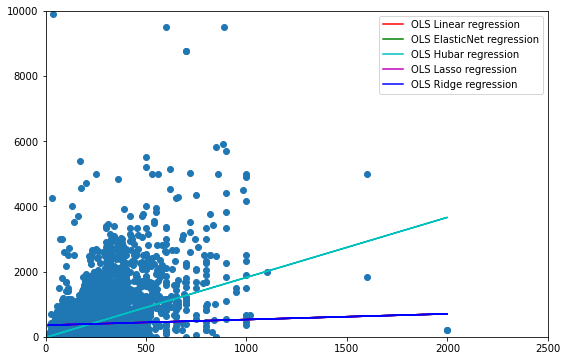

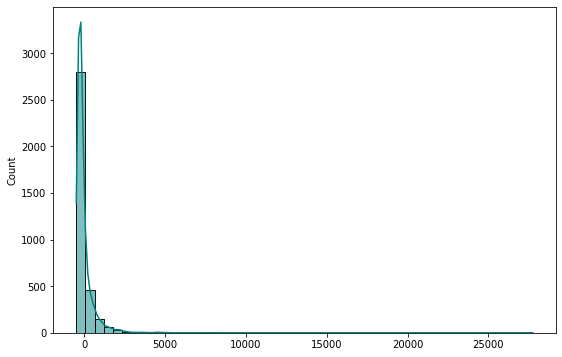

In [335]:
x = data.area.values
y = data.property_tax.values

x_train, x_test, y_train, y_test = train_test_split(x.reshape(-1, 1), y, test_size = 0.33, random_state = 56)


model = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
y_pred = model.predict(x_test)

plt.figure(figsize = (9, 6))
plt.scatter(x, y)
plt.plot(x_test, y_pred, color = 'r', label = 'OLS Linear regression')
plt.legend()

print('Liner R2: ', r2_score(y_test, y_pred))

model = ElasticNet(alpha=91.265996, l1_ratio=0.500000).fit(x_train.reshape(-1, 1), y_train)
y_pred = model.predict(x_test)

plt.xlim(0, 2500)
plt.ylim(0, 10000)
plt.plot(x_test, y_pred, color = 'g', label = 'OLS ElasticNet regression')
plt.legend()

print('ElasticNet R2: ', r2_score(y_test, y_pred))


model = HuberRegressor(alpha=1.0).fit(x_train.reshape(-1, 1), y_train)
y_pred = model.predict(x_test)

plt.plot(x_test, y_pred, color = 'c', label = 'OLS Hubar regression')
plt.legend()

print('Huber R2: ', r2_score(y_test, y_pred))

model = Lasso(alpha=0.1, max_iter = 10000, tol = 0.01).fit(x_train.reshape(-1, 1), y_train) 

demo_x = np.array([x_test.min(), x_test.max()])
y_pred = model.predict(x_test)

plt.plot(x_test, y_pred, color = 'm', label = 'OLS Lasso regression')
plt.legend()

print('Lasso R2: ', r2_score(y_test, y_pred))

model = Ridge(alpha=0.1, max_iter = 10000, tol = 0.01).fit(x_train.reshape(-1, 1), y_train) 

y_pred = model.predict(x_test)

plt.plot(x_test, y_pred, color = 'b', label = 'OLS Ridge regression')
plt.legend()

print('Ridge R2: ', r2_score(y_test, y_pred))

plt.figure(figsize = (9, 6))
errors = y_test - y_pred
sns.histplot(errors, color="teal", kde=True, bins=50)

Регрессия Риджа не дала преимуществ перед другими регрессиями. Попробуем на данных без аномалий.

Liner R2:  0.3856192206026874
ElasticNet R2:  0.3856281017020998
Huber R2:  0.3499024995857256
Lasso R2:  0.3856192348856955
Ridge R2:  0.38561922060866705


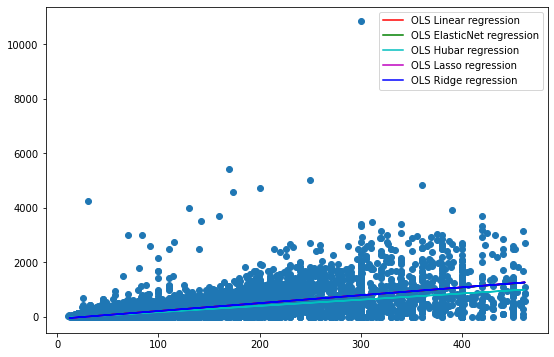

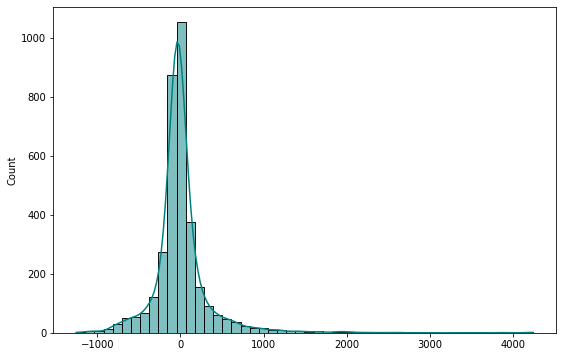

In [336]:
x = cleaned_area
y = cleaned_property_tax

x_train, x_test, y_train, y_test = train_test_split(x.reshape(-1, 1), y, test_size = 0.33, random_state = 56)


model = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
y_pred = model.predict(x_test)

plt.figure(figsize = (9, 6))
plt.scatter(x, y)
plt.plot(x_test, y_pred, color = 'r', label = 'OLS Linear regression')
plt.legend()

print('Liner R2: ', r2_score(y_test, y_pred))

model = ElasticNet(alpha=91.265996, l1_ratio=0.500000).fit(x_train.reshape(-1, 1), y_train)
y_pred = model.predict(x_test)

plt.plot(x_test, y_pred, color = 'g', label = 'OLS ElasticNet regression')
plt.legend()

print('ElasticNet R2: ', r2_score(y_test, y_pred))


model = HuberRegressor( alpha=1.0).fit(x_train.reshape(-1, 1), y_train)
y_pred = model.predict(x_test)

plt.plot(x_test, y_pred, color = 'c', label = 'OLS Hubar regression')
plt.legend()

print('Huber R2: ', r2_score(y_test, y_pred))


model = Lasso(alpha=0.1, max_iter = 10000, tol = 0.01).fit(x_train.reshape(-1, 1), y_train) 

y_pred = model.predict(x_test)

plt.plot(x_test, y_pred, color = 'm', label = 'OLS Lasso regression')
plt.legend()

print('Lasso R2: ', r2_score(y_test, y_pred))

model = Ridge(alpha=0.1).fit(x_train.reshape(-1, 1), y_train) 

y_pred = model.predict(x_test)

plt.plot(x_test, y_pred, color = 'b', label = 'OLS Ridge regression')
plt.legend()

print('Ridge R2: ', r2_score(y_test, y_pred))

plt.figure(figsize = (9, 6))
errors = y_test - y_pred
sns.histplot(errors, color="teal", kde=True, bins=50)

# **Полиминальная Регрессия**
Данная регресиия подойдет для нелинейно разделяемых данных. В данном методе проводится кривая линия, зависимая от точек плоскости. В полиномиальной регрессии степень некоторых независимых переменных превышает 1. Например, получится что-то подобное:
Y = a_1*X_1 + (a_2)²*X_2 + (a_3)⁴*X_3 ……. a_n*X_n + b
У некоторых переменных есть степень, у других — нет. Также можно выбрать определенную степень для каждой переменной, но для этого необходимы определенные знания о том, как входные данные связаны с выходными.

Необходимо внимательно создавать модель. Необходимо обладать некоторыми знаниями о данных, для выбора наиболее подходящей степени.При неправильном выборе степени, данная модель может быть перенасыщена.

In [337]:
from sklearn.preprocessing import PolynomialFeatures

Liner R2:  0.02688736508266021
ElasticNet R2:  0.026865778485508973
Huber R2:  0.19612177811816778
Lasso R2:  0.026887324801638468
Ridge R2:  0.026887365081679437
Polynomial R2:  0.16608636722017633


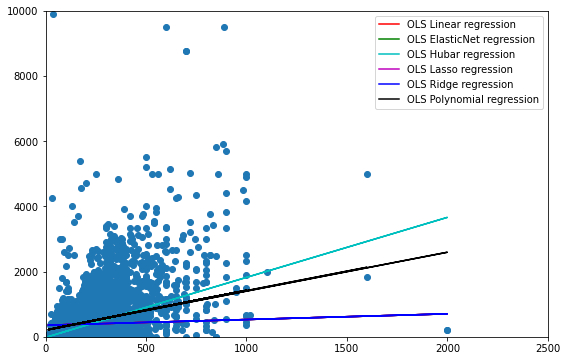

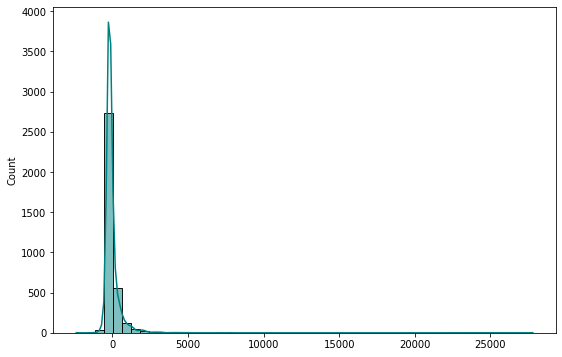

In [343]:
x = data.area.values
y = data.property_tax.values

x_train, x_test, y_train, y_test = train_test_split(x.reshape(-1, 1), y, test_size = 0.33, random_state = 56)


model = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
y_pred = model.predict(x_test)

plt.figure(figsize = (9, 6))
plt.scatter(x, y)
plt.plot(x_test, y_pred, color = 'r', label = 'OLS Linear regression')
plt.legend()

print('Liner R2: ', r2_score(y_test, y_pred))

model = ElasticNet(alpha=91.265996, l1_ratio=0.500000).fit(x_train.reshape(-1, 1), y_train)
y_pred = model.predict(x_test)

plt.xlim(0, 2500)
plt.ylim(0, 10000)
plt.plot(x_test, y_pred, color = 'g', label = 'OLS ElasticNet regression')
plt.legend()

print('ElasticNet R2: ', r2_score(y_test, y_pred))


model = HuberRegressor(alpha=1.0).fit(x_train.reshape(-1, 1), y_train)
y_pred = model.predict(x_test)

plt.plot(x_test, y_pred, color = 'c', label = 'OLS Hubar regression')
plt.legend()

print('Huber R2: ', r2_score(y_test, y_pred))

model = Lasso(alpha=0.1, max_iter = 10000, tol = 0.01).fit(x_train.reshape(-1, 1), y_train) 

demo_x = np.array([x_test.min(), x_test.max()])
y_pred = model.predict(x_test)

plt.plot(x_test, y_pred, color = 'm', label = 'OLS Lasso regression')
plt.legend()

print('Lasso R2: ', r2_score(y_test, y_pred))

model = Ridge(alpha=0.1, max_iter = 10000, tol = 0.01).fit(x_train.reshape(-1, 1), y_train) 

y_pred = model.predict(x_test)

plt.plot(x_test, y_pred, color = 'b', label = 'OLS Ridge regression')
plt.legend()

print('Ridge R2: ', r2_score(y_test, y_pred))

x_poly = PolynomialFeatures(degree = 2).fit_transform(x_train.reshape(-1, 1), y_train) 

model = LinearRegression().fit(x_poly, y_train)
y_pred = model.predict(PolynomialFeatures(degree = 2).fit_transform((x_test).reshape(-1, 1)))

plt.plot(x_test, y_pred, color = 'k', label = 'OLS Polynomial regression')
plt.legend()

print('Polynomial R2: ', r2_score(y_test, y_pred))

plt.figure(figsize = (9, 6))
errors = y_test - y_pred
sns.histplot(errors, color="teal", kde=True, bins=50)



Полиминальная регрессия показала себя лучше большинства регресий, но не превзошла Хьюбера.Попробуем на данных без аномалий.

Liner R2:  0.3856192206026874
ElasticNet R2:  0.3856281017020998
Huber R2:  0.3499024995857256
Lasso R2:  0.3856192348856955
Ridge R2:  0.38561922060866705
Polynomial R2:  0.3870933721235891


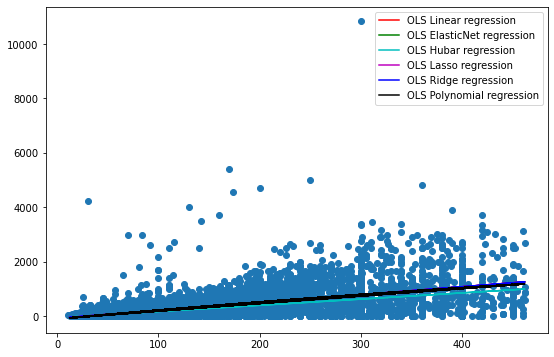

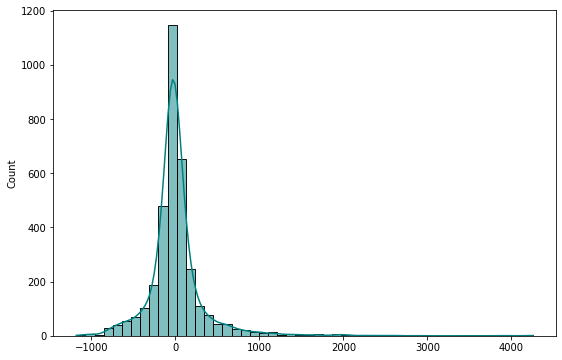

In [359]:
x = cleaned_area
y = cleaned_property_tax

x_train, x_test, y_train, y_test = train_test_split(x.reshape(-1, 1), y, test_size = 0.33, random_state = 56)


model = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
y_pred = model.predict(x_test)

plt.figure(figsize = (9, 6))
plt.scatter(x, y)
plt.plot(x_test, y_pred, color = 'r', label = 'OLS Linear regression')
plt.legend()

print('Liner R2: ', r2_score(y_test, y_pred))

model = ElasticNet(alpha=91.265996, l1_ratio=0.500000).fit(x_train.reshape(-1, 1), y_train)
y_pred = model.predict(x_test)

plt.plot(x_test, y_pred, color = 'g', label = 'OLS ElasticNet regression')
plt.legend()

print('ElasticNet R2: ', r2_score(y_test, y_pred))


model = HuberRegressor(alpha=1.0).fit(x_train.reshape(-1, 1), y_train)
y_pred = model.predict(x_test)

plt.plot(x_test, y_pred, color = 'c', label = 'OLS Hubar regression')
plt.legend()

print('Huber R2: ', r2_score(y_test, y_pred))

model = Lasso(alpha=0.1, max_iter = 10000, tol = 0.01).fit(x_train.reshape(-1, 1), y_train) 

demo_x = np.array([x_test.min(), x_test.max()])
y_pred = model.predict(x_test)

plt.plot(x_test, y_pred, color = 'm', label = 'OLS Lasso regression')
plt.legend()

print('Lasso R2: ', r2_score(y_test, y_pred))

model = Ridge(alpha=0.1, max_iter = 10000, tol = 0.01).fit(x_train.reshape(-1, 1), y_train) 

y_pred = model.predict(x_test)

plt.plot(x_test, y_pred, color = 'b', label = 'OLS Ridge regression')
plt.legend()

print('Ridge R2: ', r2_score(y_test, y_pred))

x_poly = PolynomialFeatures(degree = 2).fit_transform(x_train.reshape(-1, 1), y_train) 

model = LinearRegression().fit(x_poly, y_train)
y_pred = model.predict(PolynomialFeatures(degree = 2).fit_transform((x_test).reshape(-1, 1)))

plt.plot(x_test, y_pred, color = 'k', label = 'OLS Polynomial regression')
plt.legend()

print('Polynomial R2: ', r2_score(y_test, y_pred))

plt.figure(figsize = (9, 6))
errors = y_test - y_pred
sns.histplot(errors, color="teal", kde=True, bins=50)

На данных без аномальных значений полиминальная регресиия дала маленькое преимущество перед другими регрессиями.

# **RANSAC Регрессия**

In [348]:
from sklearn.linear_model import RANSACRegressor

Liner R2:  0.02688736508266021
ElasticNet R2:  0.026865778485508973
Huber R2:  0.19612177811816778
Lasso R2:  0.026887324801638468
Ridge R2:  0.026887365081679437
Polynomial R2:  0.16608636722017633
RANSAC R2:  0.051328529705088055


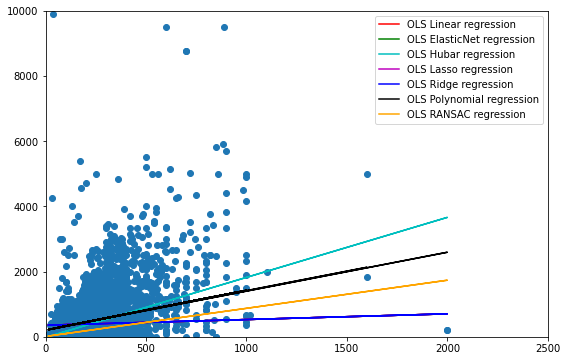

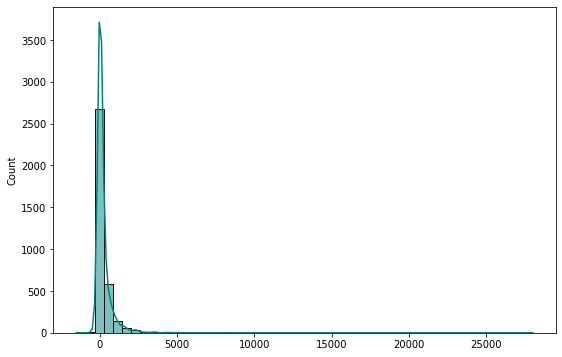

In [362]:
x = data.area.values
y = data.property_tax.values

x_train, x_test, y_train, y_test = train_test_split(x.reshape(-1, 1), y, test_size = 0.33, random_state = 56)


model = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
y_pred = model.predict(x_test)

plt.figure(figsize = (9, 6))
plt.scatter(x, y)
plt.plot(x_test, y_pred, color = 'r', label = 'OLS Linear regression')
plt.legend()

print('Liner R2: ', r2_score(y_test, y_pred))

model = ElasticNet(alpha=91.265996, l1_ratio=0.500000).fit(x_train.reshape(-1, 1), y_train)
y_pred = model.predict(x_test)

plt.xlim(0, 2500)
plt.ylim(0, 10000)
plt.plot(x_test, y_pred, color = 'g', label = 'OLS ElasticNet regression')
plt.legend()

print('ElasticNet R2: ', r2_score(y_test, y_pred))


model = HuberRegressor(alpha=1.0).fit(x_train.reshape(-1, 1), y_train)
y_pred = model.predict(x_test)

plt.plot(x_test, y_pred, color = 'c', label = 'OLS Hubar regression')
plt.legend()

print('Huber R2: ', r2_score(y_test, y_pred))

model = Lasso(alpha=0.1, max_iter = 10000, tol = 0.01).fit(x_train.reshape(-1, 1), y_train) 

demo_x = np.array([x_test.min(), x_test.max()])
y_pred = model.predict(x_test)

plt.plot(x_test, y_pred, color = 'm', label = 'OLS Lasso regression')
plt.legend()

print('Lasso R2: ', r2_score(y_test, y_pred))

model = Ridge(alpha=0.1, max_iter = 10000, tol = 0.01).fit(x_train.reshape(-1, 1), y_train) 

y_pred = model.predict(x_test)

plt.plot(x_test, y_pred, color = 'b', label = 'OLS Ridge regression')
plt.legend()

print('Ridge R2: ', r2_score(y_test, y_pred))

x_poly = PolynomialFeatures(degree = 2).fit_transform(x_train.reshape(-1, 1), y_train) 

model = LinearRegression().fit(x_poly, y_train)
y_pred = model.predict(PolynomialFeatures(degree = 2).fit_transform((x_test).reshape(-1, 1)))

plt.plot(x_test, y_pred, color = 'k', label = 'OLS Polynomial regression')
plt.legend()

print('Polynomial R2: ', r2_score(y_test, y_pred))

model = RANSACRegressor(random_state=0).fit(x_train.reshape(-1, 1), y_train) 

y_pred = model.predict(x_test)

plt.plot(x_test, y_pred, color = 'orange', label = 'OLS RANSAC regression')
plt.legend()

print('RANSAC R2: ', r2_score(y_test, y_pred))

plt.figure(figsize = (9, 6))
errors = y_test - y_pred
sns.histplot(errors, color="teal", kde=True, bins=50)

Ransac регрессия заняла третье место после Хьюьера и Полиминальной регресии.Попробуем на данных без аномалий.

Liner R2:  0.3856192206026874
ElasticNet R2:  0.3856281017020998
Huber R2:  0.3499024995857256
Lasso R2:  0.3856192348856955
Ridge R2:  0.38561922060866705
Polynomial R2:  0.3870933721235891
RANSAC R2:  0.14636613348039984


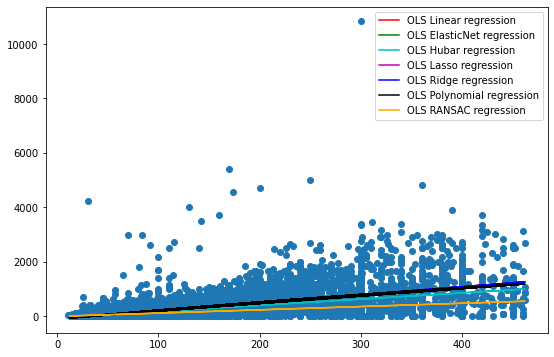

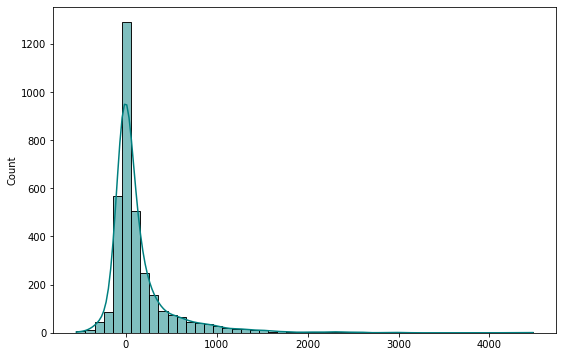

In [357]:
x = cleaned_area
y = cleaned_property_tax

x_train, x_test, y_train, y_test = train_test_split(x.reshape(-1, 1), y, test_size = 0.33, random_state = 56)


model = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
y_pred = model.predict(x_test)

plt.figure(figsize = (9, 6))
plt.scatter(x, y)
plt.plot(x_test, y_pred, color = 'r', label = 'OLS Linear regression')
plt.legend()

print('Liner R2: ', r2_score(y_test, y_pred))

model = ElasticNet(alpha=91.265996, l1_ratio=0.500000).fit(x_train.reshape(-1, 1), y_train)
y_pred = model.predict(x_test)

plt.plot(x_test, y_pred, color = 'g', label = 'OLS ElasticNet regression')
plt.legend()

print('ElasticNet R2: ', r2_score(y_test, y_pred))


model = HuberRegressor(alpha=1.0).fit(x_train.reshape(-1, 1), y_train)
y_pred = model.predict(x_test)

plt.plot(x_test, y_pred, color = 'c', label = 'OLS Hubar regression')
plt.legend()

print('Huber R2: ', r2_score(y_test, y_pred))

model = Lasso(alpha=0.1, max_iter = 10000, tol = 0.01).fit(x_train.reshape(-1, 1), y_train) 

demo_x = np.array([x_test.min(), x_test.max()])
y_pred = model.predict(x_test)

plt.plot(x_test, y_pred, color = 'm', label = 'OLS Lasso regression')
plt.legend()

print('Lasso R2: ', r2_score(y_test, y_pred))

model = Ridge(alpha=0.1, max_iter = 10000, tol = 0.01).fit(x_train.reshape(-1, 1), y_train) 

y_pred = model.predict(x_test)

plt.plot(x_test, y_pred, color = 'b', label = 'OLS Ridge regression')
plt.legend()

print('Ridge R2: ', r2_score(y_test, y_pred))

x_poly = PolynomialFeatures(degree = 2).fit_transform(x_train.reshape(-1, 1), y_train) 

model = LinearRegression().fit(x_poly, y_train)
y_pred = model.predict(PolynomialFeatures(degree = 2).fit_transform((x_test).reshape(-1, 1)))

plt.plot(x_test, y_pred, color = 'k', label = 'OLS Polynomial regression')
plt.legend()

print('Polynomial R2: ', r2_score(y_test, y_pred))

model = RANSACRegressor(random_state=0).fit(x_train.reshape(-1, 1), y_train) 

y_pred = model.predict(x_test)

plt.plot(x_test, y_pred, color = 'orange', label = 'OLS RANSAC regression')
plt.legend()

print('RANSAC R2: ', r2_score(y_test, y_pred))

plt.figure(figsize = (9, 6))
errors = y_test - y_pred
sns.histplot(errors, color="teal", kde=True, bins=50)

На данных без аномалий регресиия показала себя хуже остальных.

## **Вывод**


На исходных данных лучше вспего себя показала регресиия Хьюбера, ее меньшее влияния аномальных значений дало это преимущество.

Liner R2:  0.02688736508266021

ElasticNet R2:  0.026865778485508973

Huber R2:  0.19612177811816778

Lasso R2:  0.026887324801638468

Ridge R2:  0.026887365081679437

Polynomial R2:  0.16608636722017633

RANSAC R2:  0.051328529705088055

На данных чистых от аномалий незначительно превзошла полиминальная регресии. В целом все регрессии кроме RANSAC примерно одинаковые.

Liner R2:  0.3856192206026874

ElasticNet R2:  0.3856281017020998

Huber R2:  0.3499024995857256

Lasso R2:  0.3856192348856955

Ridge R2:  0.38561922060866705

Polynomial R2:  0.3870933721235891

RANSAC R2:  0.14636613348039984

Попробуем поработать с полиминальной регресией. Изменим степеть регрессии.

Polynomial R2:  0.2352286087888854


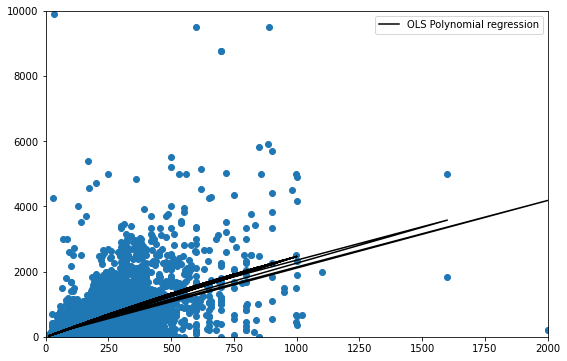

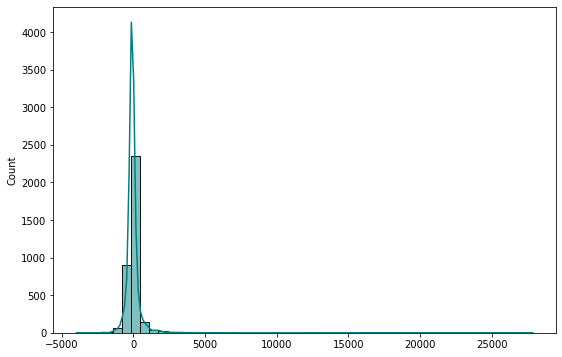

In [369]:
x = data.area.values
y = data.property_tax.values

x_train, x_test, y_train, y_test = train_test_split(x.reshape(-1, 1), y, test_size = 0.33, random_state = 56)

plt.figure(figsize = (9, 6))
plt.scatter(x, y)


plt.xlim(0, 2000)
plt.ylim(0, 10000)

x_poly = PolynomialFeatures(degree = 4).fit_transform(x_train.reshape(-1, 1), y_train) 

model = LinearRegression().fit(x_poly, y_train)
y_pred = model.predict(PolynomialFeatures(degree = 4).fit_transform((x_test).reshape(-1, 1)))

plt.plot(x_test, y_pred, color = 'k', label = 'OLS Polynomial regression')
plt.legend()

print('Polynomial R2: ', r2_score(y_test, y_pred))

plt.figure(figsize = (9, 6))
errors = y_test - y_pred
sns.histplot(errors, color="teal", kde=True, bins=50)

Polynomial R2 степень = 2:  0.16608636722017633

Polynomial R2 степень = 3:  0.2266944533615286

Polynomial R2 степень = 4:  0.2352286087888854

Polynomial R2 степень = 5:  -0.0036985395141935218


При степени 5 модель перенасытилась. Посомтрим как себя покажет на данных без аномалий

Polynomial R2:  0.3949201892648392


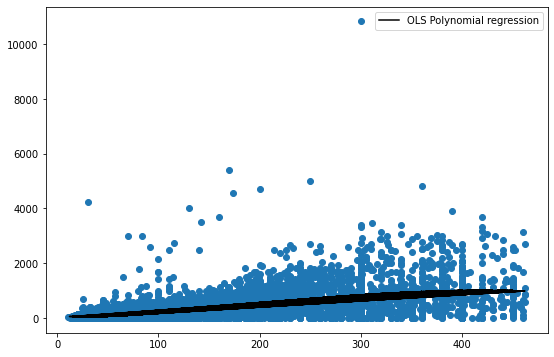

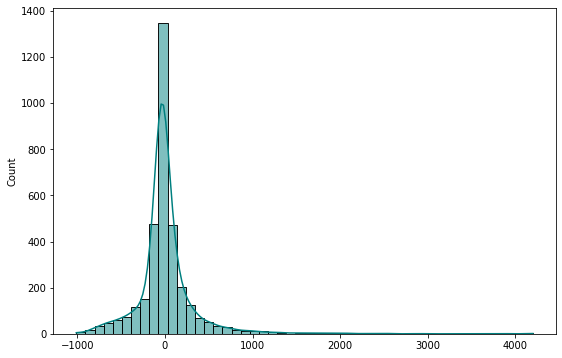

In [380]:
x = cleaned_area
y = cleaned_property_tax

x_train, x_test, y_train, y_test = train_test_split(x.reshape(-1, 1), y, test_size = 0.33, random_state = 56)

plt.figure(figsize = (9, 6))
plt.scatter(x, y)

x_poly = PolynomialFeatures(degree = 5).fit_transform(x_train.reshape(-1, 1), y_train) 

model = LinearRegression().fit(x_poly, y_train)
y_pred = model.predict(PolynomialFeatures(degree = 5).fit_transform((x_test).reshape(-1, 1)))

plt.plot(x_test, y_pred, color = 'k', label = 'OLS Polynomial regression')
plt.legend()

print('Polynomial R2: ', r2_score(y_test, y_pred))

plt.figure(figsize = (9, 6))
errors = y_test - y_pred
sns.histplot(errors, color="teal", kde=True, bins=50)

Polynomial R2 степень = 1:  0.3856192206026874

Polynomial R2 степень = 2:  0.3870933721235891

Polynomial R2 степень = 3:  0.3947297153674203

Polynomial R2 степень = 4:  0.3944232309643748

Polynomial R2 степень = 5:  0.3949201892648392

Polynomial R2 степень = 6:  0.39480147288336453

Polynomial R2 степень = 10:  0.3880086919763467

Здесь наоборот при степени 5 показала наилучший результат.